In [1]:
import pandas as pd
filename = 'hosp.xlsx'
df = pd.read_excel(filename)
#df2 = pd.read_excel(filename)

In [2]:
df.head(2)

,Day,newHosp,newCC,newRHome,newDeath,Date,Lockdown,Curfew,Rest,Vaccination
0,1,2229,438,519,155,2020-03-19,1,1,1,0
1,2,1256,242,317,83,2020-03-20,2,2,2,0


In [3]:
import pandas as pd
from fbprophet import Prophet
m = Prophet()
#m.fit(df2)

Importing plotly failed. Interactive plots will not work.


In [4]:
df1 = df

In [5]:
df1 = df1.rename(columns={"Date": "ds", "newHosp": "y"})

In [6]:
df2 = df1[['ds','y']]

In [7]:
df2.head(2)

,ds,y
0,2020-03-19,2229
1,2020-03-20,1256


In [8]:
m = Prophet()
m.fit(df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
future = m.make_future_dataframe(periods=90)

In [10]:
future.tail(2)

,ds
429,2021-05-22
430,2021-05-23


In [11]:
import pandas as pd
from fbprophet import Prophet
m = Prophet()
m.fit(df2)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
426,2021-05-19,1695.566368,857.592955,2438.610833
427,2021-05-20,1618.024091,781.359422,2371.724835
428,2021-05-21,1576.883789,774.761739,2395.912114
429,2021-05-22,1313.735826,493.867125,2140.516538
430,2021-05-23,1065.400196,247.220210,1894.744898


In [12]:
print(df.shape,forecast.shape)

(341, 10) (431, 16)


/home/umair/python-virtual-environment/my-project-env/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/umair/python-virtual-environment/my-project-env/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


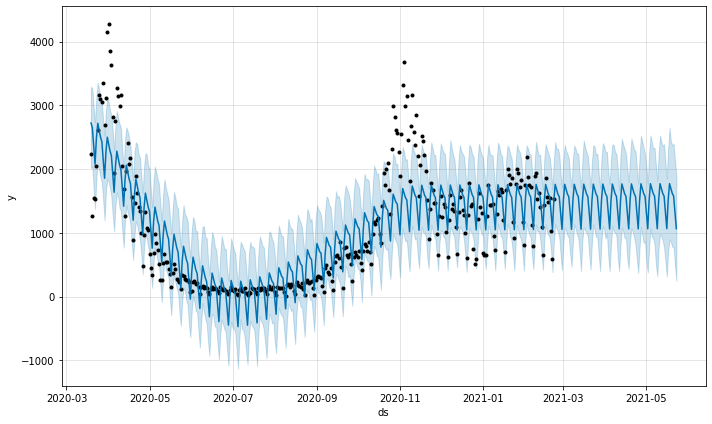

In [13]:
fig1 = m.plot(forecast)


/home/umair/python-virtual-environment/my-project-env/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/umair/python-virtual-environment/my-project-env/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


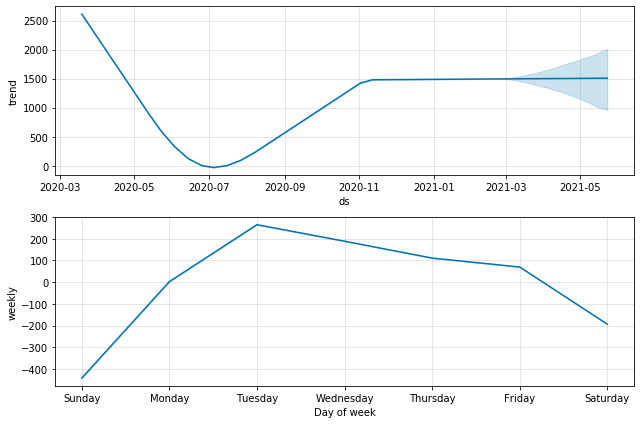

In [14]:
fig2 = m.plot_components(forecast)

In [15]:
import seaborn as sns
import matplotlib as mplv
from matplotlib import pyplot as plt

/home/umair/python-virtual-environment/my-project-env/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/umair/python-virtual-environment/my-project-env/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/umair/python-virtual-environment/my-project-env/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


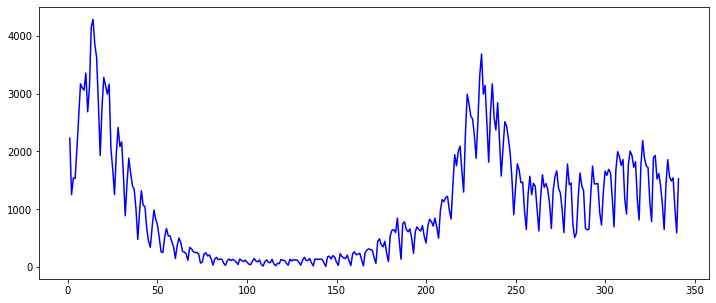

In [16]:
plt.subplots(1,1, figsize=(12,5))
plt.plot(df['Day'],df['newHosp'],'b-') # original data 341 Points

In [17]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

NameError: name 'go' is not defined

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/umair/python-virtual-environment/my-project-env/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/umair/python-virtual-environment/my-project-env/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/home/umair/python-virtual-environment/my-project-env/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dim

NameError: name 'go' is not defined

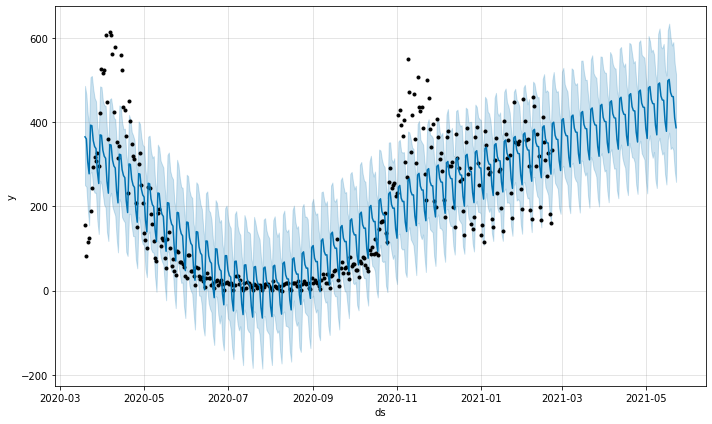

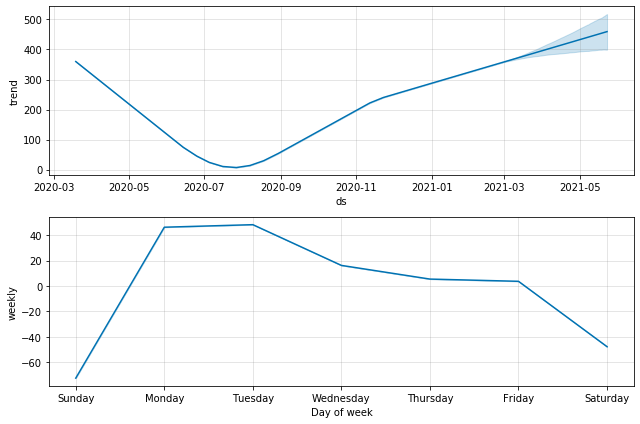

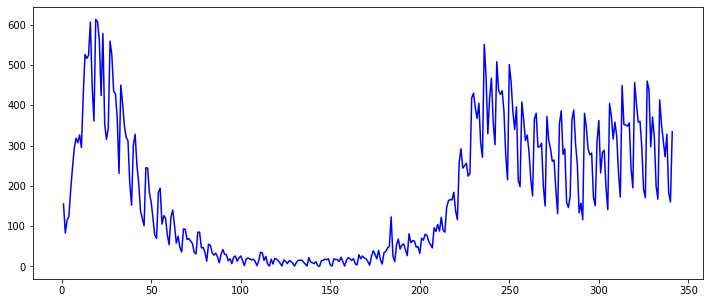

In [18]:
df1 = df
df1 = df1.rename(columns={"Date": "ds", "newDeath": "y"})
df2 = df1[['ds','y']]
df2.head(2)
m = Prophet()
m.fit(df2)
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
plt.subplots(1,1, figsize=(12,5))
plt.plot(df['Day'],df['newDeath'],'b-') # original data 341 Points
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)